In [1]:
from Models_Util import *

## Reading the input

In [2]:
math_problems = pd.read_csv("../Data/final_data.csv", index_col=0)
math_problems.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,has_eq,...,number_of_math_vocab,number_of_digits,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,False,...,2,2,2,True,False,0,False,0,False,0
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,False,...,4,0,0,False,True,2,False,0,True,1
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra,"If , then find .",1,2,False,False,False,False,...,0,4,4,True,True,2,False,0,True,3
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra,Let and . What is ?,3,3,False,False,False,False,...,0,1,1,True,False,0,False,0,True,1
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,False,...,2,0,0,False,False,0,False,0,False,0


In [3]:
math_problems.shape

(4236, 56)

In [4]:
# Defining the results array
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])

In [5]:
# Encoding type column
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
math_problems['type'] = math_problems['type'].replace(size_mapping)

## Experiment 1: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features (eg: has_exp, has_log)
3. no_of_equations
4. no_of_variables

Run Random forest for the default 5 level classification and report the results

In [6]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

### Random Forest

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5766233766233766
train_evaluation:

              precision    recall  f1-score   support

           1       0.81      0.69      0.74      1808
           2       0.50      0.70      0.59      1100
           3       0.75      0.67      0.71      1712

    accuracy                           0.69      4620
   macro avg       0.69      0.69      0.68      4620
weighted avg       0.71      0.69      0.69      4620

[[1245  355  208]
 [ 148  773  179]
 [ 147  412 1153]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.60      0.50      0.54       286
           2       0.33      0.51      0.40       249
           3       0.60      0.42      0.50     

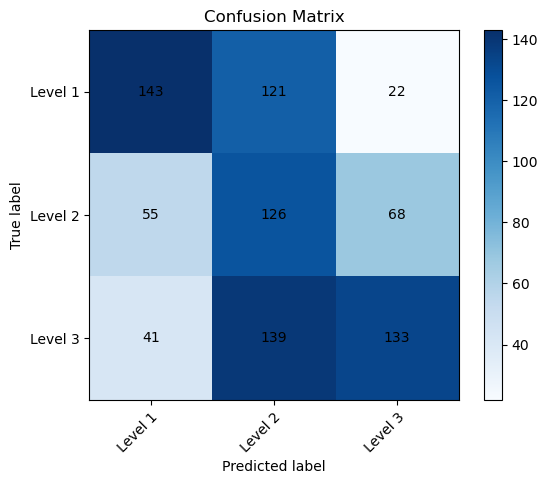

Feature Importance Rankings:
1. no_of_variables: 18.537587733083434
2. large_words_cat: 12.41831858125288
3. no_of_equations: 12.349463179499082
4. words_per_sentence_cat: 9.499258196737236
5. word_count_cat: 9.417355352657799
6. average_word_length_cat: 7.8702504996631975
7. type: 6.233433443070133
8. has_symbol: 4.721643594017559
9. has_pow: 4.038084464363203
10. has_fraction: 3.290380073670095
11. sentence_count_cat: 3.0843965772715833
12. has_digits: 2.7378270771159605
13. has_neq: 1.8694212325070454
14. has_eq: 1.7969435406816165
15. has_mod: 1.1060256649836255
16. has_logarithm: 1.0226839318135916
17. has_exp: 0.0069268576119523835


In [6]:
scores = rf_model(data1, scores=scores, experiment="Experiment1+SMOTE", club_target=True)

In [ ]:
scores

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.49233648361895055
train_evaluation:

              precision    recall  f1-score   support

           1       0.80      0.63      0.70      1217
           2       0.55      0.80      0.65      1048
           3       0.78      0.62      0.69      1123

    accuracy                           0.68      3388
   macro avg       0.71      0.68      0.68      3388
weighted avg       0.72      0.68      0.68      3388

[[761 357  99]
 [112 842  94]
 [ 82 341 700]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.62      0.52      0.56       287
           2       0.38      0.54      0.44       271
           3       0.60      0.46      0.52       290

    accuracy                           0.50       848
   macro avg       0.53      0.50      0.51       848
we

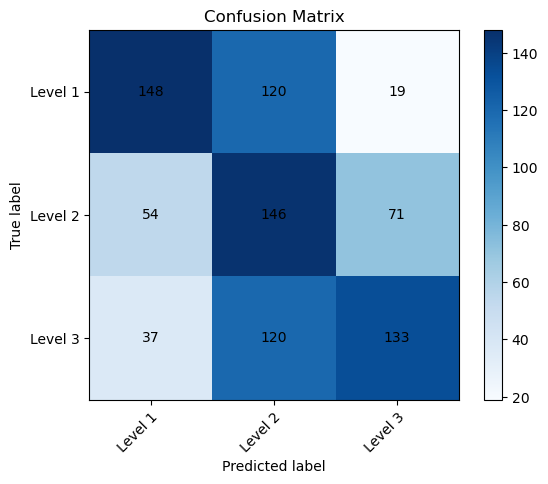

Feature Importance Rankings:
1. no_of_variables: 16.939577932398034
2. large_words_cat: 13.264933371363682
3. no_of_equations: 12.35281751792289
4. word_count_cat: 9.902227492486013
5. words_per_sentence_cat: 9.013216259171005
6. average_word_length_cat: 7.074675482419203
7. type: 6.45487023577353
8. has_symbol: 4.754587147344328
9. has_pow: 3.9870508607926576
10. sentence_count_cat: 3.4564020161835964
11. has_fraction: 3.3329296830094584
12. has_digits: 2.7608932216342503
13. has_neq: 2.3722787455186483
14. has_eq: 1.9452839287431123
15. has_mod: 1.5042320452924576
16. has_logarithm: 0.8605246196172412
17. has_exp: 0.0234994403299101


In [7]:
scores = rf_model(data1, use_smote_technique=0, scores=scores, experiment="Experiment1", club_target=True)

### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.70      0.42      0.52      1602
         2.0       0.54      0.49      0.51      1687
         3.0       0.07      0.61      0.12        99

    accuracy                           0.46      3388
   macro avg       0.43      0.50      0.38      3388
weighted avg       0.60      0.46      0.50      3388

[[665 684 253]
 [281 826 580]
 [  9  30  60]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.69      0.41      0.51       403
         2.0       0.50      0.47      0.48       416
         3.0       0.04      0.28      0.06        29

    accuracy                           0.43       848
   macro avg       0.41      0.38      0.35       848
weighted avg       0.57      0.43      0.48       848

[[164 176  63]
 [ 70 194 152]
 [  5  16   8]]


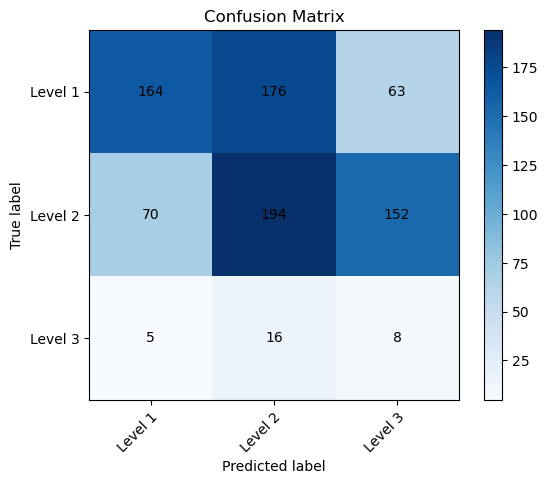

None


In [7]:
scores = Naive_Bayes_Model(data1, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment1 NB")

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.81      0.44      0.57      2801
         2.0       0.43      0.39      0.41      1711
         3.0       0.04      0.60      0.08       108

    accuracy                           0.43      4620
   macro avg       0.43      0.48      0.35      4620
weighted avg       0.65      0.43      0.50      4620

[[1245  851  705]
 [ 278  663  770]
 [  17   26   65]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.76      0.37      0.50       484
         2.0       0.42      0.47      0.45       344
         3.0       0.03      0.35      0.06        20

    accuracy                           0.41       848
   macro avg       0.40      0.40      0.33       848
weighted avg       0.60      0.41      0.47       848

[[181 21

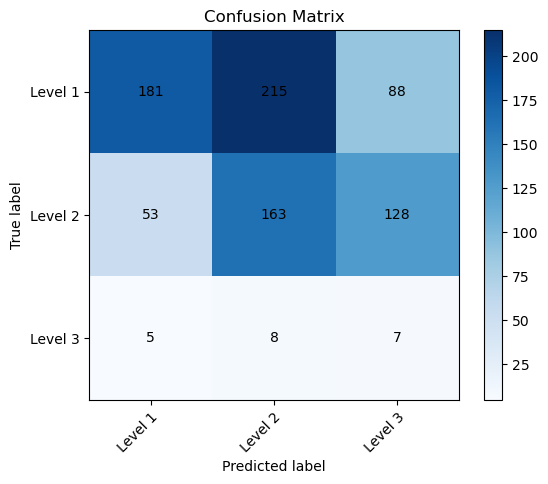

None


In [8]:
scores = Naive_Bayes_Model(data1, club_target=True, scores=scores, experiment="Experiment1 NB+SMOTE")

## Experiment 2: 

Consider the following features

1. Categorised linguistic features
2. All numerical math features

Run Random forest with default 5 class classification and report the results

In [9]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

### random Forest

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.570995670995671
train_evaluation:

              precision    recall  f1-score   support

           1       0.83      0.71      0.76      1812
           2       0.54      0.75      0.63      1108
           3       0.77      0.70      0.74      1700

    accuracy                           0.71      4620
   macro avg       0.71      0.72      0.71      4620
weighted avg       0.74      0.71      0.72      4620

[[1279  336  197]
 [ 129  829  150]
 [ 132  375 1193]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.52      0.56       280
           2       0.33      0.51      0.40       252
           3       0.63      0.44      0.52      

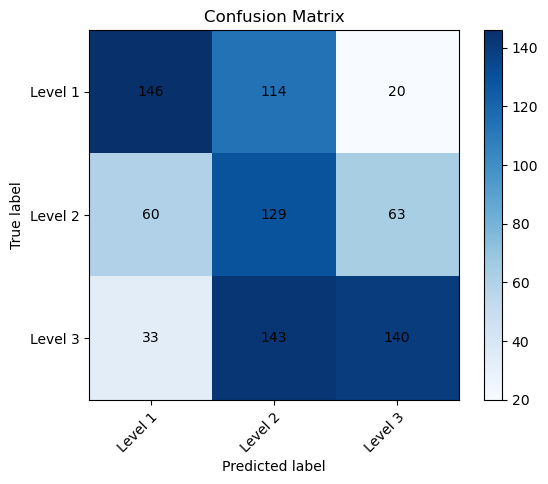

Feature Importance Rankings:
1. no_of_variables: 11.869823686743281
2. large_words_cat: 10.716102552627998
3. word_count_cat: 8.339561847287968
4. no_of_equations: 7.841744866794678
5. max_degree_of_equations: 7.706318654423164
6. words_per_sentence_cat: 7.384205945560633
7. symbol_count: 7.373909554364644
8. number_of_digits: 7.269449431916293
9. average_word_length_cat: 6.015914952827826
10. number_of_numbers: 5.986908778234763
11. no_of_pow: 5.774338309853958
12. type: 4.398534806196111
13. fracs_count: 3.103038951803956
14. sentence_count_cat: 2.4357456846622525
15. neqlts_count: 1.1921216569621025
16. eqlts_count: 1.1497975447787032
17. mod_count: 0.9318527980311603
18. log_count: 0.5098455792234476
19. no_of_exps: 0.0007843977070749916


In [9]:
scores = rf_model(data2, scores=scores, experiment="Experiment2+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.48997180864738155
train_evaluation:

              precision    recall  f1-score   support

           1       0.79      0.64      0.71      1188
           2       0.57      0.81      0.67      1087
           3       0.78      0.63      0.70      1113

    accuracy                           0.69      3388
   macro avg       0.72      0.69      0.69      3388
weighted avg       0.72      0.69      0.69      3388

[[758 338  92]
 [102 884 101]
 [ 95 318 700]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.53      0.57       276
           2       0.38      0.55      0.45       264
           3       0.63      0.45      0.53       308

    accuracy                           0.51       848
   macro avg       0.54      0.51      0.51      

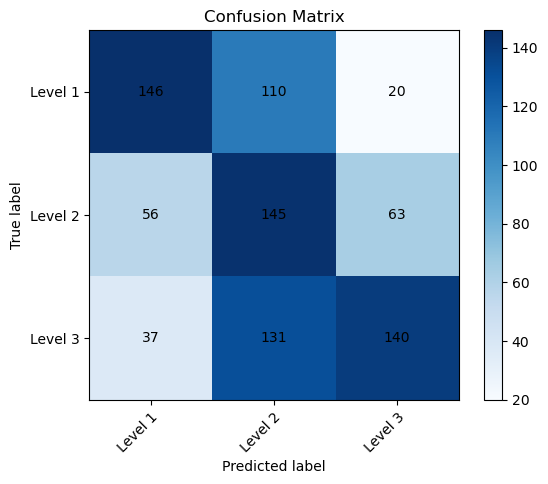

Feature Importance Rankings:
1. large_words_cat: 12.434072628641436
2. no_of_variables: 11.189563883036103
3. word_count_cat: 9.599288018178415
4. no_of_equations: 8.719237328311303
5. words_per_sentence_cat: 6.854996617243031
6. symbol_count: 6.712406914366978
7. number_of_digits: 6.506157196755587
8. max_degree_of_equations: 6.11017670857882
9. average_word_length_cat: 5.517888717534976
10. number_of_numbers: 5.343791277239831
11. no_of_pow: 5.311248128664625
12. type: 4.185824499885234
13. fracs_count: 3.9139005437015086
14. sentence_count_cat: 2.762733812948076
15. eqlts_count: 1.651935215397384
16. neqlts_count: 1.4622230135318155
17. mod_count: 1.236842046695158
18. log_count: 0.4845383627575809
19. no_of_exps: 0.0031750865321371305


In [11]:
scores = rf_model(data2, use_smote_technique=0, scores=scores, experiment="Experiment2", club_target=True)

### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.75      0.35      0.48      2039
         2.0       0.32      0.45      0.38      1088
         3.0       0.14      0.46      0.21       261

    accuracy                           0.39      3388
   macro avg       0.40      0.42      0.35      3388
weighted avg       0.56      0.39      0.42      3388

[[716 942 381]
 [204 493 391]
 [ 35 105 121]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.78      0.36      0.50       510
         2.0       0.33      0.47      0.39       272
         3.0       0.11      0.36      0.17        66

    accuracy                           0.40       848
   macro avg       0.41      0.40      0.35       848
weighted avg       0.58      0.40      0.44       848

[[186 227  97]
 [ 42 128 102]
 [ 11  31  24]]


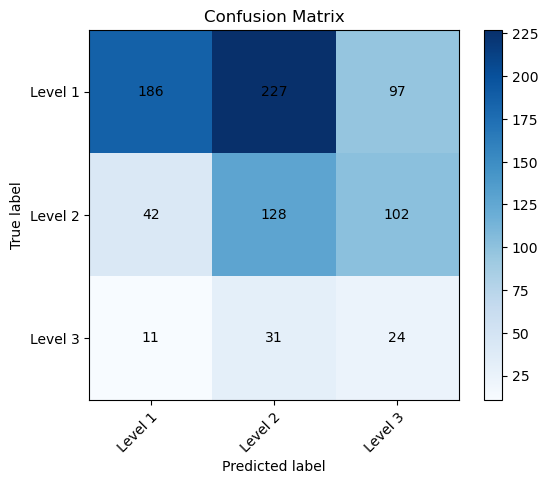

None


In [10]:
scores = Naive_Bayes_Model(data2, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment2 NB")

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.81      0.41      0.54      3079
         2.0       0.28      0.35      0.31      1208
         3.0       0.12      0.54      0.19       333

    accuracy                           0.40      4620
   macro avg       0.40      0.43      0.35      4620
weighted avg       0.62      0.40      0.46      4620

[[1253 1004  822]
 [ 245  426  537]
 [  42  110  181]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.77      0.34      0.47       544
         2.0       0.30      0.48      0.37       237
         3.0       0.11      0.37      0.17        67

    accuracy                           0.38       848
   macro avg       0.39      0.40      0.34       848
weighted avg       0.59      0.38      0.42       848

[[185 24

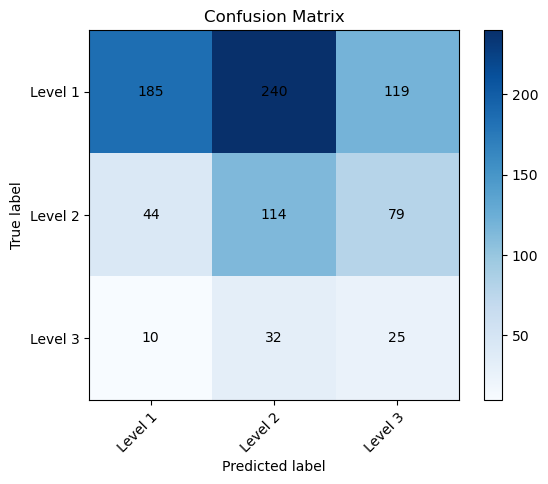

None


In [11]:
scores = Naive_Bayes_Model(data2, club_target=True, scores=scores, experiment="Experiment2 NB+SMOTE")

## Experiment 3: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features
3. POS features
4. no_of_equations
5. no_of_variables

Run Random Forest on the default 5 class classification and report the results



In [12]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

### Random Forest

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5932900432900432
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.75      0.80      1767
           2       0.64      0.78      0.70      1261
           3       0.81      0.78      0.79      1592

    accuracy                           0.77      4620
   macro avg       0.77      0.77      0.76      4620
weighted avg       0.78      0.77      0.77      4620

[[1318  286  163]
 [ 141  984  136]
 [  81  270 1241]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.51      0.56       287
           2       0.39      0.56      0.46       267
           3       0.62      0.47      0.54     

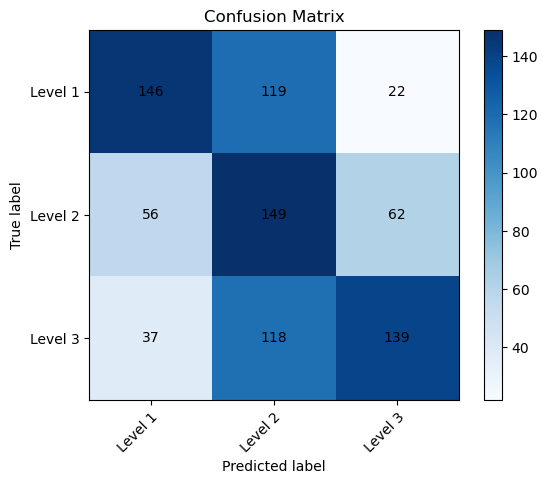

Feature Importance Rankings:
1. no_of_variables: 10.100235473176298
2. ADJ: 7.7478791289682745
3. NOUN: 6.712002818151038
4. no_of_equations: 6.064159675683461
5. VERB: 6.047922599766887
6. PUNCT: 5.38220925000742
7. ADP: 4.836726251734988
8. large_words_cat: 4.747777340132133
9. DET: 4.430361176056912
10. word_count_cat: 3.8321017592198183
11. has_pow: 3.2464299282072666
12. AUX: 3.2039908077119046
13. words_per_sentence_cat: 3.127230398083717
14. has_symbol: 2.9968817382180624
15. PRON: 2.8425116257269543
16. average_word_length_cat: 2.771486224657556
17. NUM: 2.596140540604067
18. type: 2.441197428483847
19. SCONJ: 2.283794260311884
20. PROPN: 2.261035871179032
21. CCONJ: 1.9540633051505263
22. ADV: 1.9215196615287047
23. has_digits: 1.7603026465897273
24. has_fraction: 1.6716099632965862
25. has_eq: 0.8397240632226624
26. PART: 0.7622666455270466
27. has_neq: 0.7380248584218684
28. X: 0.7330690670585639
29. sentence_count_cat: 0.7312282489621408
30. SYM: 0.5674330093816976
31. has_

In [13]:
scores = rf_model(data3, scores=scores, experiment="Experiment3+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5162355176185061
train_evaluation:

              precision    recall  f1-score   support

           1       0.84      0.69      0.75      1167
           2       0.66      0.84      0.74      1219
           3       0.82      0.73      0.77      1002

    accuracy                           0.75      3388
   macro avg       0.77      0.75      0.75      3388
weighted avg       0.77      0.75      0.75      3388

[[ 800  290   77]
 [ 113 1018   88]
 [  42  232  728]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.59      0.51      0.55       277
           2       0.39      0.49      0.43       302
           3       0.57      0.47      0.51       269

    accuracy                           0.49       848
   macro avg       0.51      0.49      0.

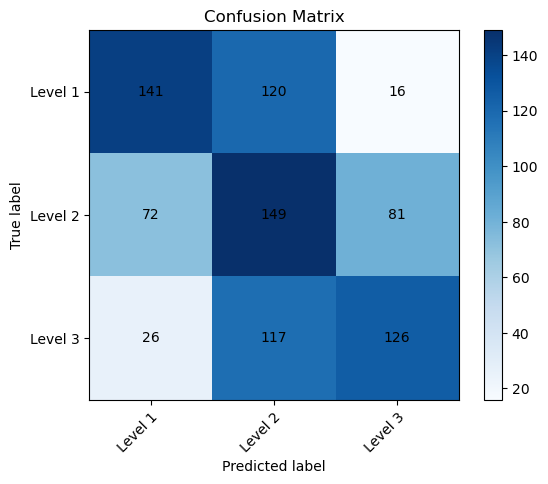

Feature Importance Rankings:
1. no_of_variables: 10.662838927505934
2. ADJ: 8.035841029079378
3. large_words_cat: 6.271227732837477
4. NOUN: 6.1804152492353595
5. no_of_equations: 5.86602010730532
6. VERB: 5.424298879361867
7. PUNCT: 5.2479854874378615
8. ADP: 4.7940652102594585
9. DET: 4.628310701343857
10. word_count_cat: 3.6284617820325846
11. PRON: 3.247063831522537
12. AUX: 2.852341021384597
13. words_per_sentence_cat: 2.851203543148526
14. NUM: 2.6496715394675414
15. average_word_length_cat: 2.5098265635254156
16. ADV: 2.5042681476293858
17. type: 2.495370285839207
18. has_pow: 2.4732907780174633
19. SCONJ: 2.4712129755126195
20. CCONJ: 2.457490087728285
21. has_symbol: 2.3465424641600614
22. PROPN: 2.2197276363430145
23. has_fraction: 1.5810709339200706
24. has_digits: 1.1676246567815296
25. PART: 0.8954633110228358
26. has_neq: 0.8905730016057876
27. has_eq: 0.7957682743872765
28. sentence_count_cat: 0.7254754926234703
29. X: 0.7026999414252847
30. SYM: 0.6125951347164933
31. h

In [14]:
scores = rf_model(data3, use_smote_technique=0, scores=scores, experiment="Experiment3", club_target=True)

### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.58      0.47      0.52      1158
         2.0       0.54      0.51      0.53      1615
         3.0       0.32      0.47      0.38       615

    accuracy                           0.49      3388
   macro avg       0.48      0.49      0.48      3388
weighted avg       0.51      0.49      0.50      3388

[[550 470 138]
 [316 831 468]
 [ 89 239 287]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.54      0.46      0.49       281
         2.0       0.52      0.48      0.50       415
         3.0       0.30      0.43      0.35       152

    accuracy                           0.46       848
   macro avg       0.45      0.46      0.45       848
weighted avg       0.48      0.46      0.47       848

[[128 121  32]
 [ 90 200 125]
 [ 21  65  66]]


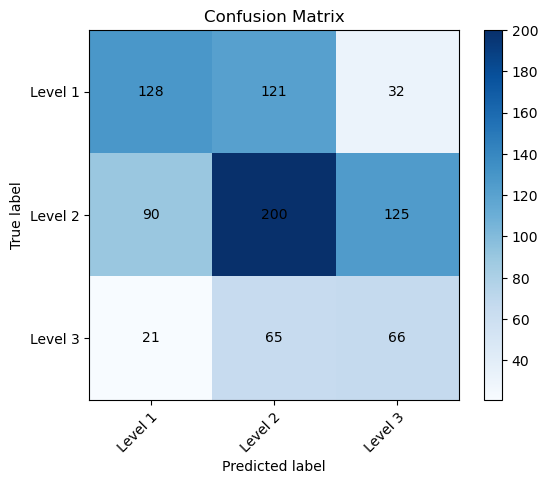

None


In [13]:
scores = Naive_Bayes_Model(data3, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment3 NB")

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.81      0.44      0.57      2801
         2.0       0.43      0.39      0.41      1711
         3.0       0.04      0.60      0.08       108

    accuracy                           0.43      4620
   macro avg       0.43      0.48      0.35      4620
weighted avg       0.65      0.43      0.50      4620

[[1245  851  705]
 [ 278  663  770]
 [  17   26   65]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.76      0.37      0.50       484
         2.0       0.42      0.47      0.45       344
         3.0       0.03      0.35      0.06        20

    accuracy                           0.41       848
   macro avg       0.40      0.40      0.33       848
weighted avg       0.60      0.41      0.47       848

[[181 21

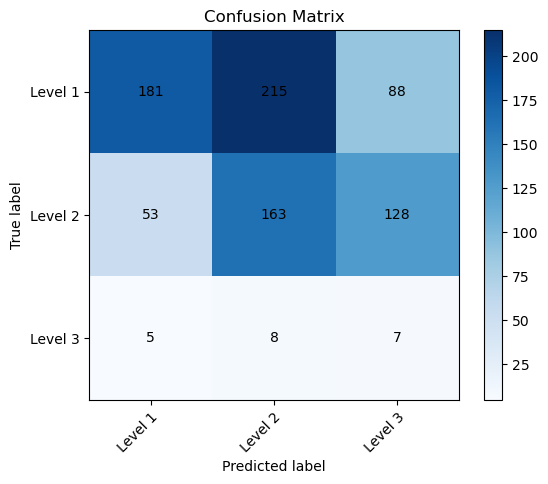

None


In [14]:
scores = Naive_Bayes_Model(data1, club_target=True, scores=scores, experiment="Experiment1 NB+SMOTE")

## Experiment 4: 

Consider the following features

1. Categorised linguistic features
2. Numerical math features
3. POS features

Run Random Forest on the default 5 class classification and report the results



In [15]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + TARGET_FEATURE]

### Random Forest

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5848484848484848
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.74      0.79      1798
           2       0.64      0.81      0.72      1216
           3       0.82      0.79      0.80      1606

    accuracy                           0.77      4620
   macro avg       0.77      0.78      0.77      4620
weighted avg       0.79      0.77      0.78      4620

[[1325  302  171]
 [ 122  990  104]
 [  93  248 1265]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.50      0.55       292
           2       0.33      0.52      0.40       247
           3       0.60      0.43      0.50     

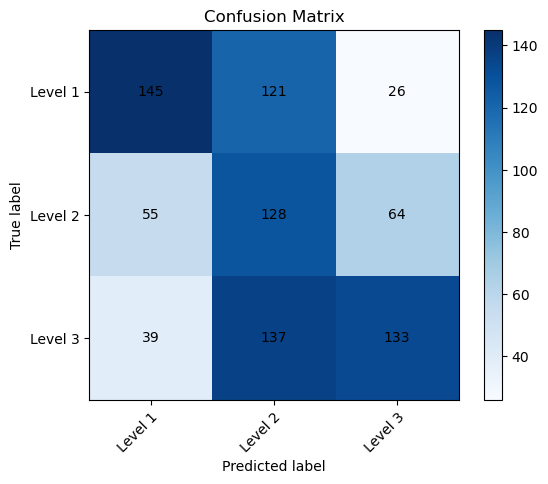

Feature Importance Rankings:
1. ADJ: 8.549093162294024
2. VERB: 6.2823406211182915
3. symbol_count: 6.158353483584289
4. max_degree_of_equations: 5.970317718960736
5. NOUN: 5.95740305678375
6. PUNCT: 5.678530448645146
7. large_words_cat: 5.262769915215869
8. number_of_digits: 4.958315328246126
9. DET: 4.627647784996258
10. no_of_pow: 4.37275598306974
11. ADP: 4.045826786137551
12. number_of_numbers: 3.8586967593774646
13. word_count_cat: 3.079320205770644
14. AUX: 3.0758380192244346
15. PRON: 3.036953988339095
16. words_per_sentence_cat: 2.9017186721388044
17. NUM: 2.7069058428853583
18. average_word_length_cat: 2.4668724611333404
19. SCONJ: 2.4650767648728342
20. fracs_count: 2.3578997123695453
21. CCONJ: 2.2742663411632464
22. PROPN: 2.1639954840151496
23. ADV: 1.855203000521698
24. eqlts_count: 1.0433172978225909
25. PART: 0.9668442432948345
26. neqlts_count: 0.9405596914681281
27. X: 0.8349155849196158
28. sentence_count_cat: 0.7789004205146817
29. SYM: 0.5107202574455447
30. mod_c

In [16]:
scores = rf_model(data4, scores=scores, experiment="Experiment4+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5053206276170682
train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.66      0.73      1184
           2       0.64      0.84      0.73      1186
           3       0.81      0.71      0.75      1018

    accuracy                           0.74      3388
   macro avg       0.76      0.74      0.74      3388
weighted avg       0.76      0.74      0.74      3388

[[785 314  85]
 [106 993  87]
 [ 64 233 721]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.49      0.54       297
           2       0.39      0.54      0.45       281
           3       0.55      0.46      0.50       270

    accuracy                           0.49       848
   macro avg       0.52      0.49      0.50       848
weight

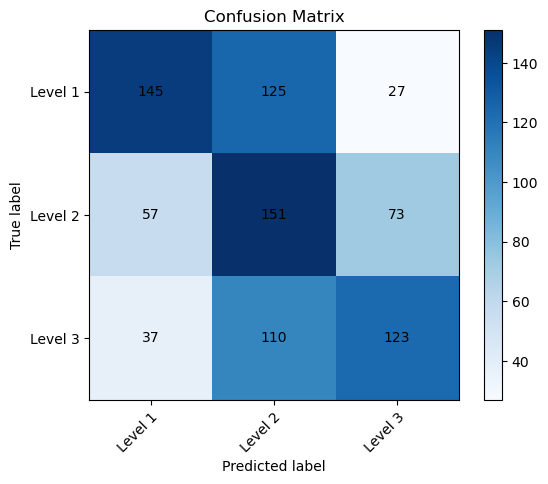

Feature Importance Rankings:
1. ADJ: 9.451870953653437
2. max_degree_of_equations: 7.397344199708369
3. large_words_cat: 6.098711431036923
4. VERB: 5.7598062390661955
5. NOUN: 5.260742246993247
6. PUNCT: 4.750231370613374
7. DET: 4.588571681320263
8. symbol_count: 4.489024766587989
9. number_of_digits: 4.4410280206960495
10. ADP: 4.335230359177926
11. no_of_pow: 4.314386998452486
12. word_count_cat: 4.088208994808828
13. number_of_numbers: 3.9480412515239887
14. AUX: 3.040278996077693
15. NUM: 3.0053725165906386
16. PRON: 2.722367346045136
17. SCONJ: 2.569672090322302
18. CCONJ: 2.5094756954332516
19. words_per_sentence_cat: 2.4062250232362605
20. fracs_count: 2.3207886368398856
21. average_word_length_cat: 2.262019391427405
22. ADV: 2.055663055870176
23. PROPN: 1.8154250604142896
24. neqlts_count: 1.152484892185558
25. PART: 1.074766914939472
26. X: 1.055558352243604
27. eqlts_count: 1.0010290251182994
28. mod_count: 0.6269311642966068
29. SYM: 0.5750868294251626
30. sentence_count_ca

In [17]:
scores = rf_model(data4, use_smote_technique=0, scores=scores, experiment="Experiment4", club_target=True)

### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.59      0.39      0.47      1437
         2.0       0.45      0.47      0.46      1453
         3.0       0.25      0.45      0.32       498

    accuracy                           0.44      3388
   macro avg       0.43      0.44      0.42      3388
weighted avg       0.48      0.44      0.45      3388

[[567 650 220]
 [316 690 447]
 [ 72 200 226]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.62      0.39      0.48       373
         2.0       0.44      0.47      0.46       360
         3.0       0.24      0.46      0.31       115

    accuracy                           0.44       848
   macro avg       0.43      0.44      0.42       848
weighted avg       0.49      0.44      0.45       848

[[147 167  59]
 [ 78 171 111]
 [ 14  48  53]]


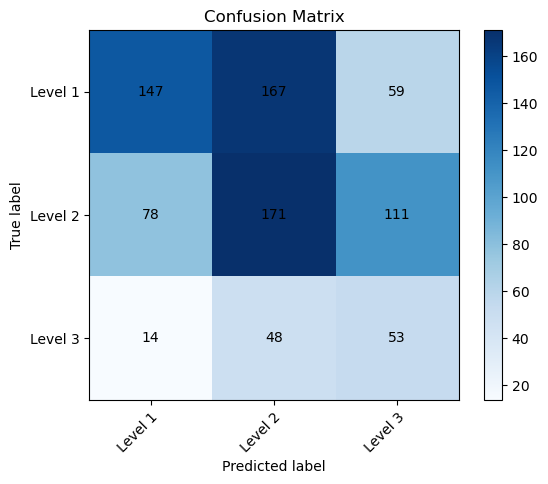

None


In [16]:
scores = Naive_Bayes_Model(data4, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment4 NB")

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.73      0.44      0.55      2574
         2.0       0.33      0.38      0.35      1322
         3.0       0.25      0.52      0.33       724

    accuracy                           0.43      4620
   macro avg       0.43      0.45      0.41      4620
weighted avg       0.54      0.43      0.46      4620

[[1125  813  636]
 [ 296  501  525]
 [ 119  226  379]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.71      0.38      0.49       451
         2.0       0.34      0.49      0.40       267
         3.0       0.26      0.45      0.33       130

    accuracy                           0.42       848
   macro avg       0.44      0.44      0.41       848
weighted avg       0.52      0.42      0.44       848

[[170 20

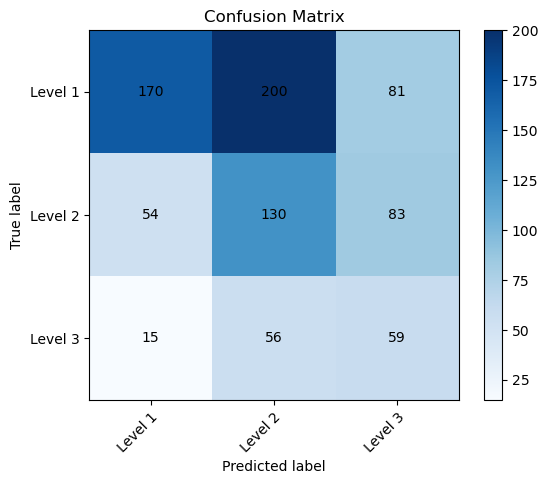

None


In [17]:
scores = Naive_Bayes_Model(data4, club_target=True, scores=scores, experiment="Experiment4 NB+SMOTE")

## Experiment 5

Consider the following features

1. Categorised linguistic features
2. Numerical Math features
3. POS features
4. Math vocab

In [18]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + TARGET_FEATURE]

### Random Forest

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5844155844155844
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.74      0.80      1791
           2       0.64      0.83      0.72      1179
           3       0.83      0.78      0.80      1650

    accuracy                           0.78      4620
   macro avg       0.78      0.78      0.77      4620
weighted avg       0.79      0.78      0.78      4620

[[1332  296  163]
 [ 103  979   97]
 [ 105  265 1280]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.51      0.55       285
           2       0.34      0.52      0.41       253
           3       0.61      0.44      0.51       3

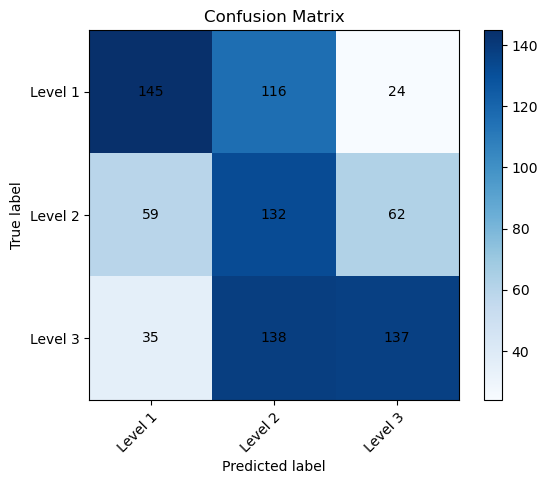

Feature Importance Rankings:
1. ADJ: 6.4183086545143775
2. max_degree_of_equations: 6.029383545325063
3. symbol_count: 5.855992271670029
4. NOUN: 5.787442836173808
5. number_of_math_vocab: 5.595354582802738
6. large_words_cat: 5.4512974559313285
7. VERB: 5.223088673734585
8. number_of_digits: 4.923175450343659
9. PUNCT: 4.7847021127596046
10. no_of_pow: 4.350114034892045
11. DET: 4.309575356441664
12. ADP: 3.7718185688361134
13. word_count_cat: 3.5484106158257207
14. number_of_numbers: 3.4871004236871888
15. average_word_length_cat: 3.396597133503207
16. PRON: 2.9349482180962623
17. words_per_sentence_cat: 2.7292469323355393
18. SCONJ: 2.556357185958057
19. AUX: 2.465026705469298
20. CCONJ: 2.3302328790789955
21. fracs_count: 2.2723560385516794
22. NUM: 2.248152491442062
23. PROPN: 2.055481403535917
24. ADV: 1.808002756594546
25. eqlts_count: 1.0570786919260657
26. PART: 0.8677919997872907
27. neqlts_count: 0.8448137803378263
28. X: 0.811681823698592
29. sentence_count_cat: 0.654650650

In [19]:
scores = rf_model(data5, scores=scores, experiment="Experiment5+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5070866176041272
train_evaluation:

              precision    recall  f1-score   support

           1       0.85      0.68      0.76      1189
           2       0.65      0.85      0.74      1189
           3       0.83      0.73      0.78      1010

    accuracy                           0.75      3388
   macro avg       0.78      0.75      0.76      3388
weighted avg       0.77      0.75      0.76      3388

[[ 810  311   68]
 [  98 1006   85]
 [  47  223  740]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.63      0.52      0.57       289
           2       0.40      0.54      0.46       285
           3       0.53      0.43      0.48       274

    accuracy                           0.50       848
   macro avg       0.52      0.50     

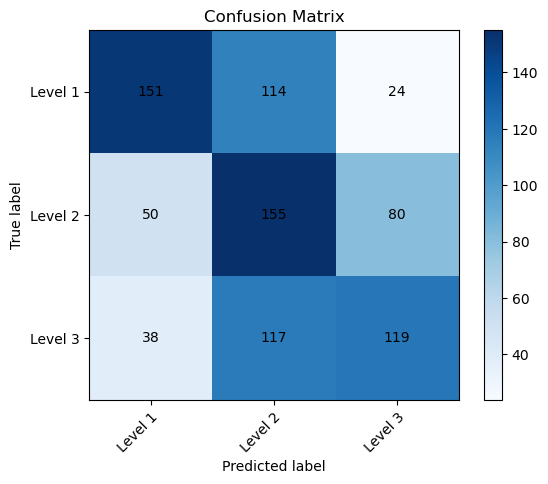

Feature Importance Rankings:
1. ADJ: 6.657970754757966
2. max_degree_of_equations: 6.094773502284303
3. symbol_count: 5.773978174620161
4. NOUN: 5.4307019739050295
5. large_words_cat: 5.412407565995072
6. PUNCT: 4.968570150893737
7. number_of_math_vocab: 4.834108840347125
8. VERB: 4.809852502947576
9. number_of_digits: 4.5359134153764105
10. DET: 4.348897263625764
11. no_of_pow: 4.273436982643662
12. ADP: 4.123521496562845
13. word_count_cat: 3.8361515789233502
14. number_of_numbers: 3.681266753495364
15. words_per_sentence_cat: 3.0529991371552647
16. AUX: 2.936952316057488
17. NUM: 2.786484422481405
18. PRON: 2.6419589255379674
19. SCONJ: 2.539710051887491
20. average_word_length_cat: 2.430860378240915
21. PROPN: 2.401090041311984
22. fracs_count: 2.2987343383030914
23. CCONJ: 2.080937739151081
24. ADV: 2.0312228496457587
25. neqlts_count: 1.2650107243323234
26. eqlts_count: 0.9650303726432454
27. X: 0.8973965274366793
28. PART: 0.8452875246358925
29. sentence_count_cat: 0.68518341182

In [20]:
scores = rf_model(data5, use_smote_technique=0, scores=scores, experiment="Experiment5", club_target=True)

### Naive Bayes

train_evaluation:

              precision    recall  f1-score   support

         1.0       0.60      0.40      0.48      1457
         2.0       0.44      0.48      0.46      1408
         3.0       0.27      0.46      0.34       523

    accuracy                           0.44      3388
   macro avg       0.44      0.45      0.43      3388
weighted avg       0.48      0.44      0.45      3388

[[576 660 221]
 [308 671 429]
 [ 71 209 243]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.62      0.40      0.49       371
         2.0       0.44      0.47      0.46       358
         3.0       0.24      0.45      0.32       119

    accuracy                           0.44       848
   macro avg       0.44      0.44      0.42       848
weighted avg       0.49      0.44      0.45       848

[[149 165  57]
 [ 76 170 112]
 [ 14  51  54]]


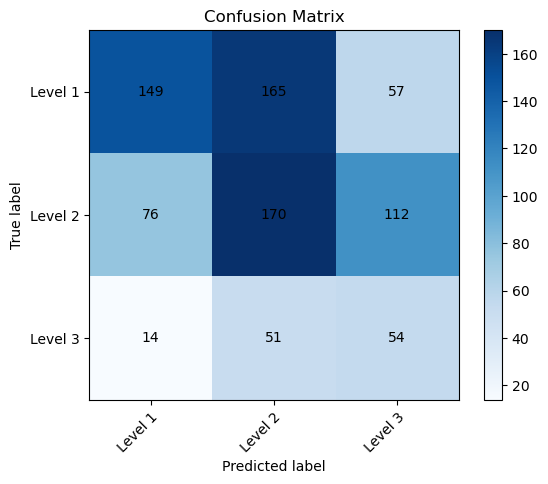

None


In [19]:
scores = Naive_Bayes_Model(data5, club_target=True, use_smote_technique=0, scores=scores, experiment="Experiment5 NB")

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
train_evaluation:

              precision    recall  f1-score   support

         1.0       0.74      0.45      0.56      2540
         2.0       0.33      0.38      0.35      1323
         3.0       0.26      0.53      0.35       757

    accuracy                           0.44      4620
   macro avg       0.44      0.45      0.42      4620
weighted avg       0.54      0.44      0.46      4620

[[1135  792  613]
 [ 290  507  526]
 [ 115  241  401]]

test_evaluation:

              precision    recall  f1-score   support

         1.0       0.70      0.39      0.50       435
         2.0       0.35      0.49      0.41       279
         3.0       0.28      0.46      0.35       134

    accuracy                           0.43       848
   macro avg       0.44      0.45      0.42       848
weighted avg       0.52      0.43      0.45       848

[[168 19

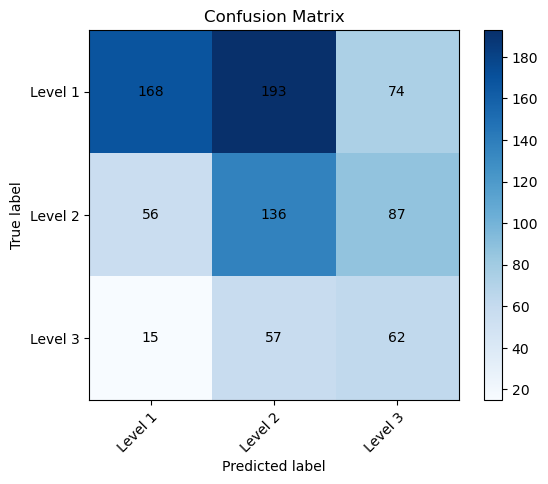

None


In [20]:
scores = Naive_Bayes_Model(data5, club_target=True, scores=scores, experiment="Experiment5 NB+SMOTE")

In [21]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.679479,0.464682
1,Experiment1,0.676332,0.497264
2,Experiment2+SMOTE,0.708560,0.479251
3,Experiment2,0.689272,0.501551
4,Experiment3+SMOTE,0.764056,0.505591
5,Experiment3,0.750485,0.485882
6,Experiment4+SMOTE,0.772172,0.469499
7,Experiment4,0.736939,0.489804
8,Experiment5+SMOTE,0.774128,0.479225
9,Experiment5,0.753096,0.497430


In [22]:
scores.to_csv("../Results/GT_3Levels.csv", index=False)

In [21]:
scores

,Model,F1_train,F1_test
0,Experiment1 NB,0.411196,0.380905
1,Experiment1 NB+SMOTE,0.353453,0.359541
2,Experiment2 NB,0.360634,0.360751
3,Experiment2 NB+SMOTE,0.348619,0.345107
4,Experiment3 NB,0.486516,0.458628
5,Experiment1 NB+SMOTE,0.353453,0.359541
6,Experiment4 NB,0.428861,0.426543
7,Experiment4 NB+SMOTE,0.410608,0.408022
8,Experiment5 NB,0.432013,0.428746
9,Experiment5 NB+SMOTE,0.419899,0.418024


In [22]:
df = pd.DataFrame({"Experiment no": [1,2,3,4,5], 
"Train f1": [0.50, 0.42, 0.50, 0.45, 0.45], 
"Test f1": [0.48, 0.44, 0.47, 0.45, 0.45], 
"Train f1 [SMOTE]": [0.50, 0.46, 0.50, 0.46, 0.46], 
"Test f1 [SMOTE]": [0.47, 0.42, 0.47, 0.44, 0.45]})
df

,Experiment no,Train f1,Test f1,Train f1 [SMOTE],Test f1 [SMOTE]
0,1,0.50,0.48,0.50,0.47
1,2,0.42,0.44,0.46,0.42
2,3,0.50,0.47,0.50,0.47
3,4,0.45,0.45,0.46,0.44
4,5,0.45,0.45,0.46,0.45
